In [1]:
import pandas as pd
noSolutionDF = pd.read_csv('output_nosol - copia 2.csv')
solutionDF = pd.read_csv('output_sol - copia 2.csv')

In [2]:
import numpy as np
noSolutionCount = noSolutionDF.shape[0]
solutionCount = solutionDF.shape[0]

print(noSolutionCount)
print(solutionCount)

noSolutionLabel = [0] * noSolutionCount 
solutionLabel = [1] * solutionCount 
labels = noSolutionLabel + solutionLabel


Y = np.array(labels)

print(Y)
print(Y.shape)

3
3
[0 0 0 1 1 1]
(6,)


In [3]:
boards = []

for indice, fila in noSolutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)
  
    

for indice, fila in solutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)

print("Total de tableros:", len(boards))

Total de tableros: 6


In [4]:
def tablero_a_tensor(tablero):
    alto = len(tablero)
    ancho = len(tablero[0])
    tensor = np.zeros((alto, ancho, 7))
    for i in range(alto):
        for j in range(ancho):
            elemento = tablero[i][j]
            if elemento == '#':
                tensor[i, j, 0] = 1
            elif elemento == '$':
                tensor[i, j, 1] = 1
            elif elemento == '.':
                tensor[i, j, 2] = 1
            elif elemento == '@':
                tensor[i, j, 3] = 1
            elif elemento == '*':
                tensor[i, j, 4] = 1
            elif elemento == '+':
                tensor[i, j, 5] = 1
            elif elemento == ' ':
                tensor[i, j, 6] = 1
                
    return tensor

X = np.array([tablero_a_tensor(tablero) for tablero in boards])

with np.printoptions(threshold=np.inf):
    print(X)


[[[[1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]]


 [[[1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 1. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.

(5, 4, 7) 4 2 2


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5, 4, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 4, 32)       │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 4, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 4, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 4, 1)        │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 1)              │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,779 (108.51 KB)

 Trainable params: 27,779 (108.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2667 - loss: 0.6990 - val_accuracy: 0.0000e+00 - val_loss: 0.6941
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9000 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.6954
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7333 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.6963
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8333 - loss: 0.6910 - val_accuracy: 0.0000e+00 - val_loss: 0.6973
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9000 - loss: 0.6898 - val_accuracy: 0.0000e+00 - val_loss: 0.6984
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5333 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6992
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8333 - loss: 0.6891 - val_accuracy: 0.0000e+00 - val_loss: 0.7003
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7333 - loss: 0.6898 - val_accuracy:

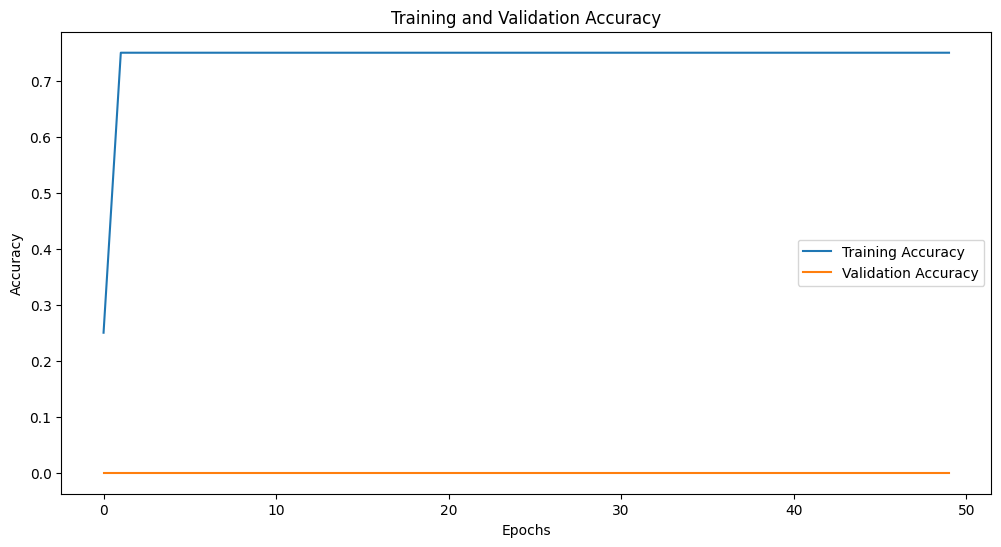

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Conv2D, GlobalMaxPooling2D,GlobalAveragePooling2D, Dense, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
print(X_train[0].shape, len(Y_train), len(X_test), len(Y_test))

'''X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)
Y_train = tf.convert_to_tensor(Y_train, dtype = tf.float32)
Y_test = tf.convert_to_tensor(Y_test, dtype = tf.float32)'''


#(height, width, channels, batch)
input_shape = (5, 4, 7)  
inputs = Input(shape=input_shape)

# Arq
#dropout
#regla para saber cuantos filtros probar
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=1, activation='relu', padding='same')(x)
# conv2d que transforma todo a x * y * 64
x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
#Condensa todos los valores de x * y * 1 a un solo valor 
x = GlobalMaxPooling2D()(x)
outputs = Dense(1, activation = "sigmoid")(x) # softmax output


model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
#model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test))

# History
history = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()